# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [135]:
#dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import scipy.stats as sts


from pprint import pprint
from config import api_key
from citipy import citipy

print(api_key)

aad29af8ad8465da8fc4785fb3164b34


## Generate Cities List

In [136]:
# generate cities as needed 
import random

lat = []
long = []

#while len(city_df) < 550:


for x in range(600):
    lat.append(round(random.uniform(-90,90),2))
    long.append(round(random.uniform(-180,180),2))

#print(lat)

city_loc_df = {
    "lat" : lat,
    "long" : long
}

city_df = pd.DataFrame(city_loc_df)

city_df.head()


,lat,long
0,-61.39,-176.08
1,-0.60,141.44
2,-14.85,-92.34
3,-72.99,-21.29
4,-33.80,-92.43


In [137]:
#convert random lat and Long into city names via citipy nearest_city
from citipy import citipy

city_name =[]
city_country = []


for row in range(len(city_df)):
    lati = city_df['lat'][row]
    longi =city_df['long'][row]
    
    city = citipy.nearest_city(lati,longi)
    
    if city.city_name not in city_name:
    
        city_name.append(city.city_name)
        city_country.append(city.country_code)
        
print(len(city_name), len(city_country))        

data = {'Name': city_name, 'Country': city_country}

city_df = pd.DataFrame(data)
city_df

318 318


,Name,Country
0,vaini,to
1,vanimo,pg
2,san cristobal,ec
3,mar del plata,ar
4,lebu,cl
...,...,...
313,ankpa,ng
314,izhma,ru
315,alto araguaia,br
316,fairbanks,us


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [138]:
#take city data and use Google API to find city data

#url basic point  api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = f'api.openweathermap.org/data/2.5/weather?q='
key = api_key

max_temp =[]
humidity = []
cloudiness = []
wind_speed = []
date_rec = []
real_lat = []
real_long = []

for row in range(len(city_df)):
   
    city_qname =  city_df['Name'][row] 
    print(city_qname)
    query_url = f'http://{url}{city_qname}&units=imperial&appid={key}'
    print(query_url)
    try:
        data = requests.get(query_url).json()
        #print(f'Successful request {row}: for city {city_qname}')
        #print(city_name[row], max_temp, humidity, cloudiness, wind_speed)
        #pprint(data)
        max_temp.append(float(data['main']['temp_max']))
        humidity.append(float(data['main']['humidity']))
        cloudiness.append(float(data['clouds']['all']))
        wind_speed.append(float(data['wind']['speed']))
        real_lat.append(float(data['coord']['lat']))
        real_long.append(float(data['coord']['lon']))
        date_rec.append(int(data['dt']))
    except: 
        #print(f'Unsuccessful request {row}: for city {city_qname}')
        max_temp.append("NA")
        humidity.append("NA")
        cloudiness.append("NA")
        wind_speed.append("NA")
        real_lat.append("NA")
        real_long.append("NA")
        date_rec.append("NA")
        
city_loc_df['Max temp'] = max_temp
city_loc_df['Humidity'] = humidity        
city_loc_df['Cloudiness'] = cloudiness    
city_loc_df['Wind Speed'] = wind_speed 
city_loc_df['Real Lat'] = real_lat 
city_loc_df['Real Long'] = real_long
city_loc_df['Date Rec'] = date_rec  


city2_df = pd.DataFrame(city_loc_df)
city2_df.head()

vaini
http://api.openweathermap.org/data/2.5/weather?q=vaini&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
vanimo
http://api.openweathermap.org/data/2.5/weather?q=vanimo&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
khor
http://api.openweathermap.org/data/2.5/weather?q=khor&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
tautira
http://api.openweathermap.

hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
borogontsy
http://api.openweathermap.org/data/2.5/weather?q=borogontsy&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
thabazimbi
http://api.openweathermap.org/data/2.5/weather?q=thabazimbi&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
shakawe
http://api.openweathermap.org/data/2.5/weather?q=shakawe&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
gimli
http://api.openweathermap.org/data/2.5/weather?q=gimli&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
khatanga
http:

severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
prince rupert
http://api.openweathermap.org/data/2.5/weather?q=prince rupert&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
saryagash
http://api.openweathermap.org/data/2.5/weather?q=saryagash&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
jalu
http://api.openweathermap.org/data/2.5/weather?q=jalu&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
santa lucia
http://api.openweathermap.org/data/2.5/weather?q=santa lucia&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
satuk
http://api.openweathermap.org/data/2.5/weather?q=satuk&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
karpathos
http://api.openweathermap.org/data/2.5/weather?q=karpathos&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
hervey bay
http://api.

yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
tecolutla
http://api.openweathermap.org/data/2.5/weather?q=tecolutla&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
nizhneyansk
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
parkes
http://api.openweathermap.org/data/2.5/weather?q=parkes&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
ahipara
http://api.openweathermap.org/data/2.5/weather?q=ahipara&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
abu kamal
http://api.openweathermap.org/data/2.5/weather?q=abu kamal&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
mount isa
http://api.openweathermap.org/data/2.5/weather?q=mount isa&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
mafra
http

nushki
http://api.openweathermap.org/data/2.5/weather?q=nushki&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
trairi
http://api.openweathermap.org/data/2.5/weather?q=trairi&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
kasane
http://api.openweathermap.org/data/2.5/weather?q=kasane&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
usinsk
http://api.openweathermap.org/data/2.5/weather?q=usinsk&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
menongue
http://api.openweathermap.org/data/2.5/weather?q=menongue&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
brownwood
http://api.openweathermap.org/data/2.5/weather?q=brownwood&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
lasa
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=imperial&appid=aad29af8ad8465da8fc4785fb3164b34
erenhot
http://api.openweathermap.org/data/2.5/wea

ValueError: arrays must all be same length

In [139]:
# reorder the columns
city2_df = city2_df[['Name','Country', 'lat', 'long', 'Real Lat', 'Real Long', 'Max temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date Rec']]

print(len(city2_df))


600


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
# Clean table - drop NA, duplicate cities

city2_df.dropna(how='any',inplace=True)
city2_df.drop_duplicates()

len(city2_df)


559

In [141]:
#Display dataframe
city2_df

,Name,Country,lat,long,Real Lat,Real Long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,lezajsk,pl,50.36,22.28,50.26,22.42,48.20,76.0,100.0,11.41,1603043626
2,burla,ru,53.10,78.14,21.50,83.87,77.72,82.0,100.0,1.63,1603043626
3,east london,za,-72.97,50.18,-33.02,27.91,62.60,72.0,50.0,10.29,1603043626
4,bredasdorp,za,-72.42,22.52,-34.53,20.04,62.60,72.0,66.0,5.82,1603043626
5,dikson,ru,88.25,91.17,73.51,80.55,26.53,89.0,81.0,29.82,1603043626
...,...,...,...,...,...,...,...,...,...,...,...
595,bluff,nz,-74.27,153.02,-46.60,168.33,46.99,93.0,100.0,2.80,1603043626
596,ormoz,si,46.47,16.10,46.41,16.15,48.00,93.0,13.0,2.24,1603043669
597,ushuaia,ar,-58.05,-55.83,-54.80,-68.30,46.40,63.0,40.0,18.34,1603043635
598,pacific grove,us,27.49,-137.78,36.62,-121.92,66.20,52.0,1.0,3.36,1603043669


In [142]:
# confirm data types for future work, convert numbers to floats
city2_df['Max temp'] = pd.to_numeric(city2_df['Max temp'], errors='coerce')
city2_df['Humidity'] = pd.to_numeric(city2_df['Humidity'], errors='coerce')
city2_df['Cloudiness'] = pd.to_numeric(city2_df['Cloudiness'], errors='coerce')
city2_df['Wind Speed'] = pd.to_numeric(city2_df['Wind Speed'], errors='coerce')
city2_df['Real Lat'] = pd.to_numeric(city2_df['Real Lat'], errors='coerce')
city2_df['Real Long'] = pd.to_numeric(city2_df['Real Long'], errors='coerce')
city2_df.dtypes



Name           object
Country        object
lat           float64
long          float64
Real Lat      float64
Real Long     float64
Max temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date Rec       object
dtype: object

In [143]:
#Write city data to csv file

city2_df.to_csv(r'city_list_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [144]:
#check if Humidity >100%
city2_df['Humidity'].max()

100.0

In [145]:
# No cities have >100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

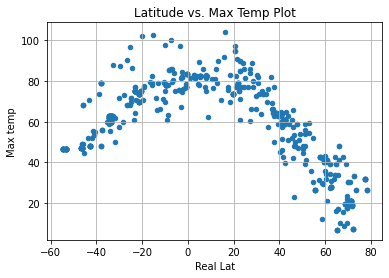

In [146]:
city2_df.plot(kind='scatter', x='Real Lat', y='Max temp')
plt.title("Latitude vs. Max Temp Plot")
plt.grid()
plt.savefig("Lat_temp.png", bbox_inches="tight")

# Observations:
# temperatures peak around the equator (+/- 25 degrees lat)
# seemingly the max temp drops more going north for cities than going south
# which is interesting.  Something else is moderating temps in the southern hemisphere


## Latitude vs. Humidity Plot

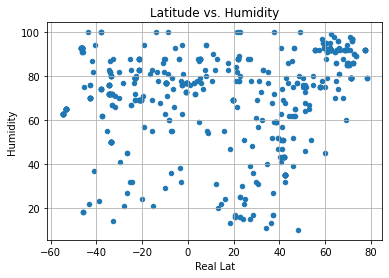

In [147]:
city2_df.plot(kind='scatter', x='Real Lat', y='Humidity')
plt.title("Latitude vs. Humidity")
plt.grid()
plt.savefig("Lat_humidity.png", bbox_inches="tight")

# Observations:
# Humidity does not seem correlated with latitude
# the range of values at <-50 lat, is pretty much the range of values >50 lat 

## Latitude vs. Cloudiness Plot

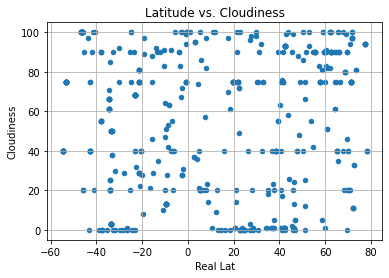

In [148]:
city2_df.plot(kind='scatter', x='Real Lat', y='Cloudiness')
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Lat_Cloudiness.png", bbox_inches="tight")

# Observations:
# Cloudiness doesn't seem correlated to latitude
# maybe a slight bias to higher cloud cover at the extremes in lat
# Quite a range of value per cities of like latitude

## Latitude vs. Wind Speed Plot

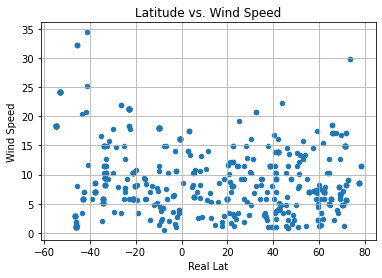

In [149]:
city2_df.plot(kind='scatter', x='Real Lat', y='Wind Speed')
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.savefig("Lat_Wind.png", bbox_inches="tight")

# Observations:
# Wind Speed doesn't seem correlated to latitude
# a pretty thorough range across all latitudes

## Linear Regression

In [150]:
# Create Northern Hemisphere datatable
north_df = city2_df.loc[city2_df['Real Lat'] >=0]
north_df

,Name,Country,lat,long,Real Lat,Real Long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,lezajsk,pl,50.36,22.28,50.26,22.42,48.20,76.0,100.0,11.41,1603043626
2,burla,ru,53.10,78.14,21.50,83.87,77.72,82.0,100.0,1.63,1603043626
5,dikson,ru,88.25,91.17,73.51,80.55,26.53,89.0,81.0,29.82,1603043626
8,saskylakh,ru,70.38,115.78,71.92,114.08,19.09,97.0,97.0,5.64,1603043626
9,jamestown,sh,-12.41,-6.43,42.10,-79.24,59.00,43.0,1.0,13.87,1603043627
...,...,...,...,...,...,...,...,...,...,...,...
587,tiksi,ru,74.94,128.95,71.69,128.87,18.54,96.0,100.0,17.22,1603043638
592,saint-louis,re,-22.17,54.53,16.33,-15.00,104.00,24.0,0.0,8.50,1603043669
594,talmenka,ru,53.83,83.62,53.82,83.57,35.60,51.0,55.0,13.42,1603043669
596,ormoz,si,46.47,16.10,46.41,16.15,48.00,93.0,13.0,2.24,1603043669


In [151]:
# Create Southern Hemisphere datatable
south_df = city2_df.loc[city2_df['Real Lat'] <0]
south_df.head()

,Name,Country,lat,long,Real Lat,Real Long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
3,east london,za,-72.97,50.18,-33.02,27.91,62.60,72.0,50.0,10.29,1603043626
4,bredasdorp,za,-72.42,22.52,-34.53,20.04,62.60,72.0,66.0,5.82,1603043626
6,bluff,nz,-63.30,165.70,-46.60,168.33,46.99,93.0,100.0,2.80,1603043626
7,atuona,pf,-11.46,-130.60,-9.80,-139.03,77.90,77.0,13.0,18.05,1603043626
11,saint-philippe,re,-51.40,67.28,-21.36,55.77,73.40,69.0,29.0,5.82,1603043627


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [152]:
# linear regression model
from scipy.stats import linregress

results = linregress(north_df['Max temp'], north_df['Real Lat'])

In [153]:
#regression values:
slope = results.slope
yinter = results.intercept

print(slope, yinter)

-0.814064979890595 87.13405371450156


In [154]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = -0.81x + 87.13


In [155]:
# R^2 value
cor_lat_temp_nor = sts.pearsonr(north_df['Max temp'],north_df['Real Lat'])
cor_lat_temp_nor[0]
r_sqre = cor_lat_temp_nor[0]*cor_lat_temp_nor[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

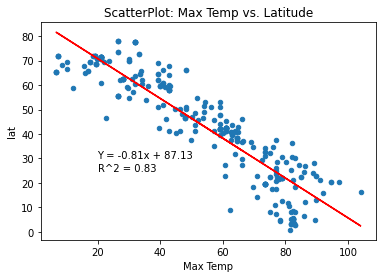

In [156]:
#plot chart with regression line
ax = north_df.plot.scatter(x = 'Max temp', y = 'Real Lat')

ax.set_title('ScatterPlot: Max Temp vs. Latitude')
ax.set_xlabel('Max Temp')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(20,25), xytext=(20,30), fontsize=10)
ax.annotate(reg_form, xy=(20,25), xytext=(20,25), fontsize=10)

x_values = north_df['Max temp']
y_values = north_df['Max temp']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [157]:
results = linregress(south_df['Max temp'], south_df['Real Lat'])

In [158]:
#regression values:
slope = results.slope
yinter = results.intercept

In [159]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.97x + -92.19


In [160]:
# R^2 value
cor_lat_temp_sth = sts.pearsonr(south_df['Max temp'],south_df['Real Lat'])
cor_lat_temp_sth[0]
r_sqre = cor_lat_temp_sth[0]*cor_lat_temp_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

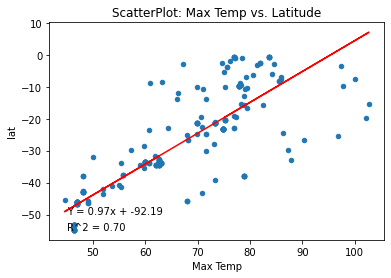

In [161]:
#plot chart with regression line
ax = south_df.plot.scatter(x = 'Max temp', y = 'Real Lat')

ax.set_title('ScatterPlot: Max Temp vs. Latitude')
ax.set_xlabel('Max Temp')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(45,-50), xytext=(45,-50), fontsize=10)
ax.annotate(reg_form, xy=(45,-55), xytext=(45,-55), fontsize=10)

x_values = south_df['Max temp']
y_values = south_df['Max temp']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [162]:
# Linear Regression (temp vs. hemipshere lat)
# confirms that as the latitude is further away from zero
# the temperature drops fairly consistently in either direction
# the slope is inverted but the magntidue of the slope is quite similar
# .98 north vs. 1.08 South

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [163]:
results = linregress(north_df['Humidity'], north_df['Real Lat'])

In [164]:
#regression values:
slope = results.slope
yinter = results.intercept

In [165]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.35x + 19.81


In [166]:
# R^2 value
cor_lat_temp_north = sts.pearsonr(north_df['Humidity'],north_df['Real Lat'])
cor_lat_temp_north[0]
r_sqre = cor_lat_temp_north[0]*cor_lat_temp_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

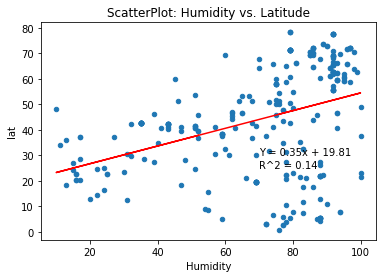

In [167]:
#plot chart with regression line
ax = north_df.plot.scatter(x = 'Humidity', y = 'Real Lat')

ax.set_title('ScatterPlot: Humidity vs. Latitude')
ax.set_xlabel('Humidity')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(70,30), xytext=(70,30), fontsize=10)
ax.annotate(reg_form, xy=(70,25), xytext=(70,25), fontsize=10)

x_values = north_df['Humidity']
y_values = north_df['Humidity']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [168]:
results = linregress(south_df['Humidity'], south_df['Real Lat'])

In [169]:
#regression values:
slope = results.slope
yinter = results.intercept

In [170]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.03x + -30.99


In [171]:
# R^2 value
cor_lat_Humidity_sth = sts.pearsonr(south_df['Humidity'],south_df['Real Lat'])
cor_lat_Humidity_sth[0]
r_sqre = cor_lat_Humidity_sth[0]*cor_lat_Humidity_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

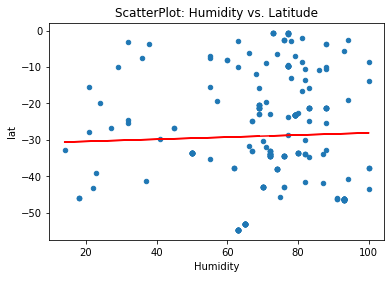

In [172]:
#plot chart with regression line
ax = south_df.plot.scatter(x = 'Humidity', y = 'Real Lat')

ax.set_title('ScatterPlot: Humidity vs. Latitude')
ax.set_xlabel('Humidity')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(25,-65), xytext=(25,-65), fontsize=10)
ax.annotate(reg_form, xy=(25,-70), xytext=(25,-70), fontsize=10)

x_values = south_df['Humidity']
y_values = south_df['Humidity']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [173]:
# Observations:  Humidity vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  .4 (magnitude) slope in the north vs. 0.14 slope in the south
# in general latitude has little value in predicting humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression eq: Y = 0.16x + 35.40


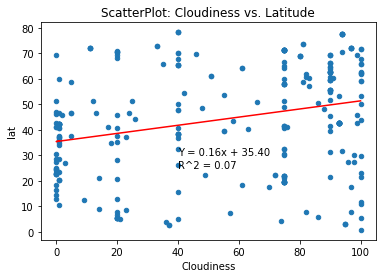

In [174]:
results = linregress(north_df['Cloudiness'], north_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_Cloudiness_north = sts.pearsonr(north_df['Cloudiness'],north_df['Real Lat'])
cor_lat_Cloudiness_north[0]
r_sqre = cor_lat_Cloudiness_north[0]*cor_lat_Cloudiness_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = north_df.plot.scatter(x = 'Cloudiness', y = 'Real Lat')

ax.set_title('ScatterPlot: Cloudiness vs. Latitude')
ax.set_xlabel('Cloudiness')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(40,30), xytext=(40,30), fontsize=10)
ax.annotate(reg_form, xy=(40,25), xytext=(40,25), fontsize=10)

x_values = north_df['Cloudiness']
y_values = north_df['Cloudiness']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression eq: Y = -0.02x + -27.66


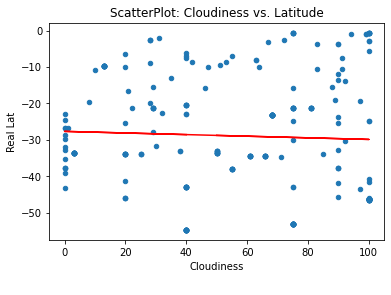

In [175]:
results = linregress(south_df['Cloudiness'], south_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_Cloudiness_sth = sts.pearsonr(south_df['Cloudiness'],south_df['Real Lat'])
cor_lat_Cloudiness_sth[0]
r_sqre = cor_lat_Cloudiness_sth[0]*cor_lat_Cloudiness_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = south_df.plot.scatter(x = 'Cloudiness', y = 'Real Lat')

ax.set_title('ScatterPlot: Cloudiness vs. Latitude')
ax.set_xlabel('Cloudiness')
ax.set_ylabel('Real Lat')


ax.annotate(short_form, xy=(20,-65), xytext=(20,-65), fontsize=10)
ax.annotate(reg_form, xy=(20,-70), xytext=(20,-70), fontsize=10)

x_values = south_df['Cloudiness']
y_values = south_df['Cloudiness']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [176]:
# Observations:  Cloudiness vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  
#.23 (magnitude) slope in the north vs. 0.2 slope in the south is fairly equal
# in general latitude has no relationship with cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression eq: Y = 0.34x + 41.39


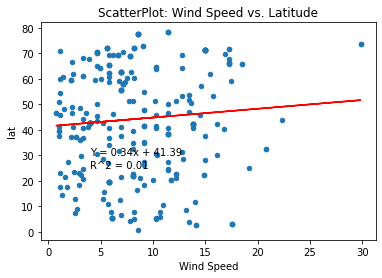

In [177]:
results = linregress(north_df['Wind Speed'], north_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_wind_north = sts.pearsonr(north_df['Wind Speed'],north_df['Real Lat'])
cor_lat_wind_north[0]
r_sqre = cor_lat_wind_north[0]*cor_lat_wind_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = north_df.plot.scatter(x = 'Wind Speed', y = 'Real Lat')

ax.set_title('ScatterPlot: Wind Speed vs. Latitude')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(4,30), xytext=(4,30), fontsize=10)
ax.annotate(reg_form, xy=(4,25), xytext=(4,25), fontsize=10)

x_values = north_df['Wind Speed']
y_values = north_df['Wind Speed']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression eq: Y = -0.25x + -26.12


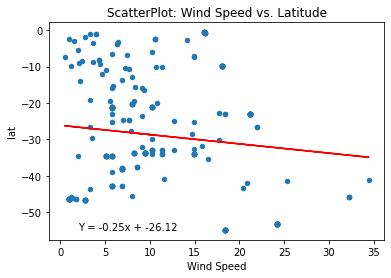

In [178]:
results = linregress(south_df['Wind Speed'], south_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_wind_sth = sts.pearsonr(south_df['Wind Speed'],south_df['Real Lat'])
cor_lat_wind_sth[0]
r_sqre = cor_lat_wind_sth[0]*cor_lat_wind_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = south_df.plot.scatter(x = 'Wind Speed', y = 'Real Lat')

ax.set_title('ScatterPlot: Wind Speed vs. Latitude')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(2,-55), xytext=(2,-55), fontsize=10)
ax.annotate(reg_form, xy=(2,-60), xytext=(2,-60), fontsize=10)

x_values = south_df['Wind Speed']
y_values = south_df['Wind Speed']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [179]:
# Observations:  Wind Speed vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  
#.88 (magnitude) slope in the north is double the south but the poor fit
# suggests this is not meaningufl
# in general latitude has no relationship with Wind Speed